In [16]:
from sklearn.linear_model import LogisticRegression   #逻辑回归回归分类器
from sklearn.linear_model import LogisticRegressionCV #带交叉验证的逻辑回归分类器
# from sklearn.linear_model import Logistic_regression_path #类似网格搜索，调参
from sklearn.linear_model import SGDClassifier #利用梯度下降求解线性分类器
from sklearn.linear_model import SGDRegressor  #利用梯度下降最小化正则化后的损失函数线性回归模型
from sklearn.metrics import log_loss #对数损失
from sklearn.metrics import confusion_matrix #混淆矩阵，模型评估指标之一
from sklearn.metrics import roc_auc_score #ROC曲线，模型评估指标之一
from sklearn.metrics import accuracy_score #精确性，模型评估指标之一

### LogisticRegression:
#### 损失函数：来衡量βX中参数为β的模型拟合训练集时的产生的信息损失大小，如果训练集上拟合准确率达到很高说明β拟合效果好，损失函数低
#### 正则化(penalty)：防止模型过拟合,因为β依赖于损失函数最小，所以损失函数正则化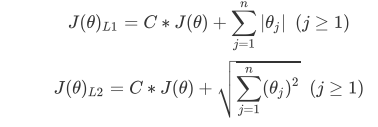防止损失函数对某个特征特别依赖，通常L1和L2两种方式('l1','l2')默认l2,如果选择'l1'正则化，参数solver只能选择'liblinear'和'saga'
#### C:正则化强度的倒数，必须是一个大于0的浮点数（可以大于1），默认为1.0，即默认正则项与损失函数的比值是1：1。C越小，损失函数会越小，模型对损失函数的惩罚越重，正则化效力越强，参数β会被压缩的越来越小，L1通常可以将参数压缩为0，L2不会。

In [17]:
from sklearn.linear_model import  LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
data = load_breast_cancer()
X = data.data
Y = data.target
X.shape

(569, 30)

In [19]:
lrl1 = LR(penalty='l1',solver = 'liblinear',C=0.5,max_iter = 1000)
lrl2 = LR(penalty='l2',solver = 'liblinear',C=0.5,max_iter = 1000)
lrl1 = lrl1.fit(X,Y)
lrl1.coef_ #查看每个特征所对应的参数

array([[ 4.00197399,  0.03172204, -0.13731273, -0.01621927,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50442226,  0.        , -0.07125136,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.2456865 , -0.12858308, -0.01441249,  0.        ,
         0.        , -2.03955583,  0.        ,  0.        ,  0.        ]])

In [20]:
lrl2 = lrl2.fit(X,Y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

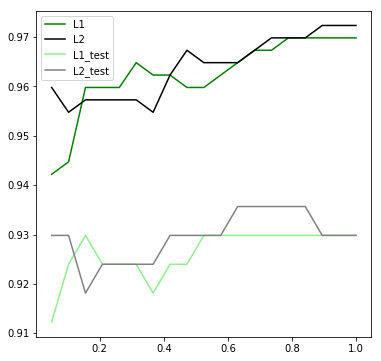

In [31]:
# 画C的学习曲线：
l1=[]
l2=[]
l1_test=[]
l2_test=[]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty='l1',solver = 'liblinear',C=i,max_iter = 1000)
    lrl2 = LR(penalty='l2',solver = 'liblinear',C=i,max_iter = 1000)
    
    lrl1.fit(x_train,y_train)
    l1.append(accuracy_score(lrl1.predict(xtrain),ytrain))
    l1_test.append(accuracy_score(lrl1.predict(xtest),ytest))
    
    lrl2.fit(x_train,y_train)
    l2.append(accuracy_score(lrl2.predict(xtrain),ytrain))
    l2_test.append(accuracy_score(lrl2.predict(xtest),ytest))
praph=[l1,l2,l1_test,l2_test]
color=['green','black','lightgreen','gray']
label=['L1','L2','L1_test','L2_test']
plt.figure(figsize=(6,6))
for i in range(len(praph)):
    plt.plot(np.linspace(0.05,1,19),praph[i],color=color[i],label=label[i])
plt.legend(loc='best')#loc=4表示右下角
plt.show()#轻微过拟合

### 逻辑回归中的特征工程：
#### PCA和SVD一般不使用，虽然高效但它降维后的特征是不可解释的，但是我们希望分析逻辑回归后特征和标签的相关性，纯粹业务场景下不想要知道关系只想看到分类结果和高准确率可以随便用
#### 统计量来进行特征选择可以用但是可能没必要：因为逻辑回归不使用最小二乘法而是最低损失法，如过滤法，卡方统计量，F检验统计量，互信息法可以使用但是没必要，效果可能不明显
#### 高效的嵌入法：embedded，包装法...

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

In [2]:
data = load_breast_cancer()

In [3]:
X=data.data
Y=data.target

In [37]:
LR_ = LR(solver='liblinear',C=0.9,random_state=420)
cross_val_score(LR_,X,Y,cv=10).mean()

0.9490601503759398

In [43]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,Y)
X_embedded.shape

(569, 9)

In [44]:
cross_val_score(LR_,X_embedded,Y,cv=10).mean() #可以调节嵌入发的threshold画学习曲线期望达到更好的结果但是基本没效果，所以再调逻辑回归C结合

0.9368107769423559

0.9578634085213033 26.51
0.9578320802005011 47.01


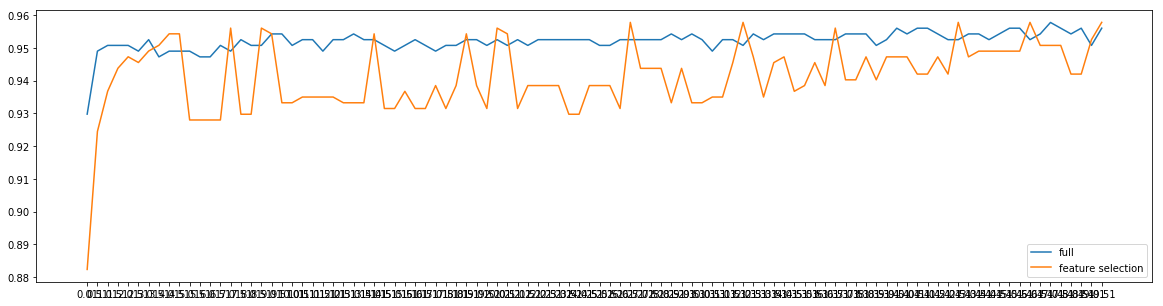

In [14]:
full_x = []
fx =[]
C=np.arange(0.01,50.01,0.5)
for i in C:
    LR_ = LR(solver = 'liblinear',C=i,random_state = 420)
    full_x.append(cross_val_score(LR_,X,Y,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,Y)
    fx.append(cross_val_score(LR_,X_embedded,Y,cv=10).mean())
    
print(max(fx),C[fx.index(max(fx))])
print(max(full_x),C[full_x.index(max(full_x))])
plt.figure(figsize = (20,5))
plt.plot(C,full_x,label='full')
plt.plot(C,fx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

#### 系数累加法:全面落后嵌入法,不介绍了；包装法:可以通过n_features_to_select=i来选择要几个特征，还可以通过step=j选择迭代次数

### 梯度下降求逻辑回归：原理是迭代法，先取一个损失函数为基点，设置其损失函数固定的变化范围，在范围内计算其周围的损失函数，选择一个比它最小的损失函数，再以这个最小的损失函数为基点...直到损失函数不变化
#### 在多元函数上对损失函数的各个自变量求偏导，把求得的各个向量的偏导数以向量形式写出就是梯度，步长是梯度的比例，梯度前面的一个系数

#### max_iter:最大迭代次数，步长大在谷型处迭代次数多，在坡型处迭代少，步长小则反之

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

D:\cn\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\cn\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\cn\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


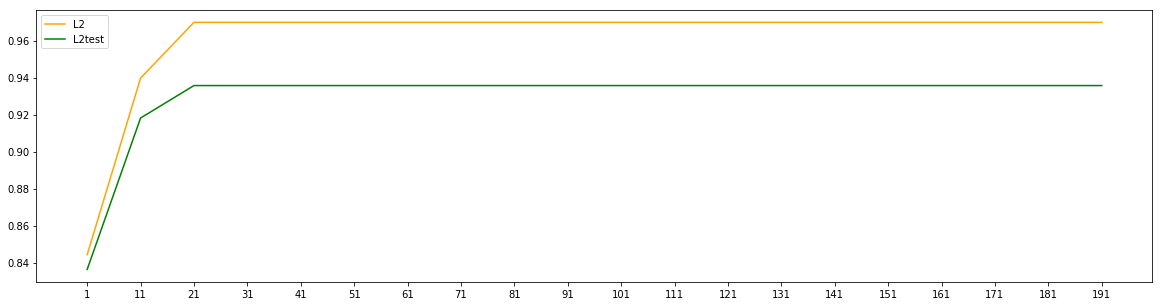

In [18]:
data =load_breast_cancer()
X=data.data
Y=data.target
l2=[]
l2test=[]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=420)
for i in range(1,201,10):
    lrl2=LR(penalty='l2',solver='liblinear',C=0.8,max_iter=i)#默认max_iter为1000,其实设置21已经够了
    lrl2=lrl2.fit(xtrain,ytrain)
    l2.append(accuracy_score(lrl2.predict(xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest),ytest))
graph=[l2,l2test]
color=['Orange','green']
label=["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc='best')
plt.xticks(np.arange(1,201,10))
plt.show()

In [20]:
lr_=LR(penalty='l2',solver='liblinear',C=0.8,max_iter=1000).fit(xtrain,ytrain)
lr_.n_iter_#虽然告诉它最多迭代一千次其实它24次就迭代完毕，报红色是因为迭代次数用完但是没有找到损失函数的最低点

array([24], dtype=int32)

#### solver:'liblinear' 'lbfgs' 'newton_cg' 'sag' 'sage',各种不同的格式
#### multi_class:'ovr'二分类问题,或者用二分法处理多分类问题,会将多分类分成二分类,默认，'multionmial'多分类问题,此时solver的'liblinear'是不可用的，'auto'视分类情况选择前两个参数
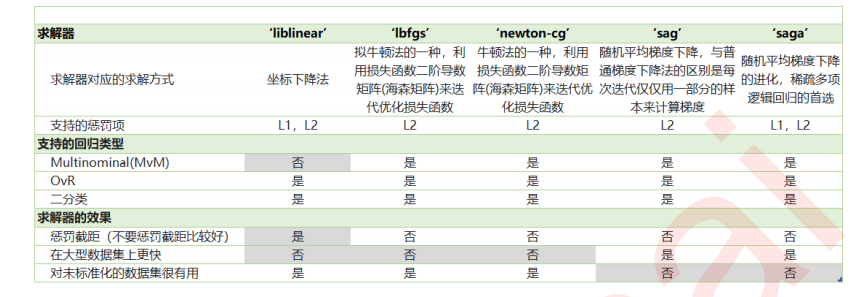

In [21]:
# 鸢尾花数据集：

In [22]:
from sklearn.datasets import load_iris

In [39]:
iris=load_iris()
iris_data=iris.data
iris_target=iris.target
for multi_class in ('ovr','multinomial'):
    clf = LR(solver='sag',max_iter=10000,random_state=200,multi_class=multi_class)
    clf = clf.fit(iris.data,iris.target)
    print('training score :%.3f(%s)'%(clf.score(iris_data,iris_target),multi_class))

training score :0.953(ovr)
training score :0.980(multinomial)


In [37]:
accuracy_score(clf.predict(iris_data),iris_target) #clf.score(iris_data,iris_target)一样

0.98

In [33]:
clf.n_iter_

array([1347])

### 样本不平衡:标签的某一类天生很少，但是误分类代价很高（如甄别犯罪分子，犯罪分子的样本少普通人的样本多，但是把犯罪分子分类为普通人代价很高，而将普通人甄别成犯罪分子的代价却没有那么高），class_weight就是这样的一个参数和分类树一样默认为None，就是给所有数据标签相同的权重
#### class_weight:可以增加少数样本的特征的权重，上采样法，不断重复少数类达到和多数类一样多

### 用逻辑回归制作评分卡：获取数据，数据清洗和特征工程，模型开发，模型检验与评估，模型上线，监测与报告

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as LR

In [6]:
data = open(r'D:\数据分析题目\数据集\05逻辑回归与评分卡\rankingcard.csv')
data = pd.read_csv(data)

In [7]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
data.shape

(150000, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [11]:
np.sum(data.duplicated())#

609

In [12]:
#删除重复值
data.drop_duplicates(inplace=True)

In [13]:
data[data.duplicated()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [15]:
data.index=range(data.shape[0])#恢复索引

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [17]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [18]:
data.isnull().mean()#缺失值所占比例

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [19]:
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)

In [20]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [21]:
def missing_fill(X,Y,fill_to):
    '''
    X是特征矩阵
    Y是一维标签
    fill_to 是字符串
    
    '''
    df=X.copy()
    fill=df.loc[:,fill_to]
    df=pd.concat([df.iloc[:,df.columns!=fill_to],pd.DataFrame(Y)],axis=1)
    
    ytrain=fill[fill.notnull()]
    ytest=fill[fill.isnull()]
    xtrain=df.iloc[ytrain.index,:]
    xtest=df.iloc[ytest.index,:]
    
    from sklearn.ensemble import RandomForestRegressor as RFR
    from sklearn.model_selection import cross_val_score
    rfr=RFR(n_estimators=50,random_state=0)
#     print(cross_val_score(rfr,xtrain,ytrain,cv=10).mean())
    rfr=rfr.fit(xtrain,ytrain)
    ypredict=rfr.predict(xtest)
    return ypredict

In [22]:
X=data.iloc[:,1:]
Y=data['SeriousDlqin2yrs']
fill_to='MonthlyIncome'

In [23]:
y_pred=missing_fill(X,Y,fill_to)

In [24]:
data.iloc[np.where(data.iloc[:,5].isnull())[0],5]=y_pred

In [25]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [26]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.526170,13215.366160,0.0,0.0,0.180000,1800.000000,4425.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [27]:
(data['age']==0).sum()

1

In [28]:
np.where(data['age']==0)

(array([65553], dtype=int64),)

In [29]:
data.iloc[65553,:] #年龄为0，输入错误，删除样本

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       1.000000
age                                        0.000000
NumberOfTime30-59DaysPastDueNotWorse       1.000000
DebtRatio                                  0.436927
MonthlyIncome                           6000.000000
NumberOfOpenCreditLinesAndLoans            6.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               2.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         2.000000
Name: 65553, dtype: float64

In [30]:
data = data.loc[data.age != 0,:]

In [31]:
data.index = range(data.shape[0])

In [32]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149390.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149390.0,6.071121,250.264509,0.0,0.0,0.003199,0.030132,0.154234,0.556491,0.978007,1.093923,50708.0
age,149390.0,52.306587,14.725390,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149390.0,0.393882,3.852966,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149390.0,354.439110,2041.850084,0.0,0.0,0.034991,0.177441,0.368233,0.875294,1275.000000,4985.110000,329664.0
MonthlyIncome,149390.0,5424.522318,13215.410308,0.0,0.0,0.180000,1800.000000,4425.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149390.0,8.480909,5.136528,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149390.0,0.238122,3.826177,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149390.0,1.022384,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149390.0,0.212504,3.810536,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [33]:
(data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']>=90).sum()

225

In [34]:
data[data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']>=90] 
#超过98次还没有还款30到59天，60到89天，和90天都是98，但是评为好客户，可以质疑是否98数值出现错误，

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.000000,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.000000,1465.532256,0,98,0,98,0.000000
3883,0,1.0,38,98,12.000000,2222.820000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.000000,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.000000,2000.000000,0,98,0,98,0.000000
5072,0,1.0,33,98,0.000000,1500.000000,0,98,0,98,0.000000
6279,1,1.0,51,98,0.000000,7500.000000,0,98,0,98,0.000000
7031,1,1.0,29,98,0.000000,1647.000000,0,98,0,98,0.000000
7116,1,1.0,25,98,21.000000,4755.860000,0,98,0,98,0.759863
7686,1,1.0,21,98,0.000000,2075.915952,0,98,0,98,0.000000


In [35]:
data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse'].value_counts()#发现有九十八和九十六次的

0     125453
1      16032
2       4598
3       1754
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [36]:
data= data[data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']<90]

In [37]:
data.index = range(data.shape[0])

In [38]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,4989.360000,329664.0
MonthlyIncome,149165.0,5428.850740,13224.572196,0.0,0.0,0.180000,1800.000000,4440.000000,7420.000000,10800.00000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


In [39]:
#先跑模型，如果效果不行再正态化和量纲化数据

In [40]:
#样本均衡问题
y = data.iloc[:,0]
x = data.iloc[:,1:]

In [41]:
y.value_counts() #严重样本不均衡

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [42]:
n_sample = x.shape[0]
n1_sample = y.value_counts()[1]
n0_sample = y.value_counts()[0]
print('样本个数:{},1占{:.2%},0占{:.2%}'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本个数:149165,1占6.62%,0占93.38%


In [43]:
import imblearn #专门处理数据不平衡的问题的库
from imblearn.over_sampling import SMOTE #上采样法重复少量数据集
sm=SMOTE(random_state=0)

In [44]:
X,Y = sm.fit_resample(x,y) # 上采样之后的数据集
n_sample_ = X.shape[0]
n_sample_

278584

In [45]:
Y.shape

(278584,)

In [46]:
Y.value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [47]:
n_1_sample=Y.value_counts()[1]
n_0_sample=Y.value_counts()[0]
print('样本个数:{},1占{:.2%},0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数:278584,1占50.00%,0占50.00%


In [48]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [49]:
model_data=pd.concat([y_train,x_train],axis=1)

In [50]:
model_data.index=range(model_data.shape[0])

In [51]:
model_data.columns = data.columns

In [52]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 11 columns):
SeriousDlqin2yrs                        195008 non-null int64
RevolvingUtilizationOfUnsecuredLines    195008 non-null float64
age                                     195008 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    195008 non-null int64
DebtRatio                               195008 non-null float64
MonthlyIncome                           195008 non-null float64
NumberOfOpenCreditLinesAndLoans         195008 non-null int64
NumberOfTimes90DaysLate                 195008 non-null int64
NumberRealEstateLoansOrLines            195008 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    195008 non-null int64
NumberOfDependents                      195008 non-null float64
dtypes: float64(4), int64(7)
memory usage: 16.4 MB


In [53]:
test_data=pd.concat([y_test,x_test],axis=1)
test_data.index=range(test_data.shape[0])
test_data.columns = data.columns 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83576 entries, 0 to 83575
Data columns (total 11 columns):
SeriousDlqin2yrs                        83576 non-null int64
RevolvingUtilizationOfUnsecuredLines    83576 non-null float64
age                                     83576 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    83576 non-null int64
DebtRatio                               83576 non-null float64
MonthlyIncome                           83576 non-null float64
NumberOfOpenCreditLinesAndLoans         83576 non-null int64
NumberOfTimes90DaysLate                 83576 non-null int64
NumberRealEstateLoansOrLines            83576 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    83576 non-null int64
NumberOfDependents                      83576 non-null float64
dtypes: float64(4), int64(7)
memory usage: 7.0 MB


In [54]:
model_data.to_csv(r'D:\数据分析题目\数据集\05逻辑回归与评分卡\评分卡\model_data.csv')
test_data.to_csv(r'D:\数据分析题目\数据集\05逻辑回归与评分卡\评分卡\test_data.csv')

In [55]:
import pandas as pd
model_data=pd.read_csv(open(r'D:\数据分析题目\数据集\05逻辑回归与评分卡\评分卡\model_data.csv'))
test_data=pd.read_csv(open(r'D:\数据分析题目\数据集\05逻辑回归与评分卡\评分卡\test_data.csv'))

In [56]:
model_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data.drop('Unnamed: 0',axis=1,inplace=True)

分箱,将连续性变量离散化,评分卡最多分5个
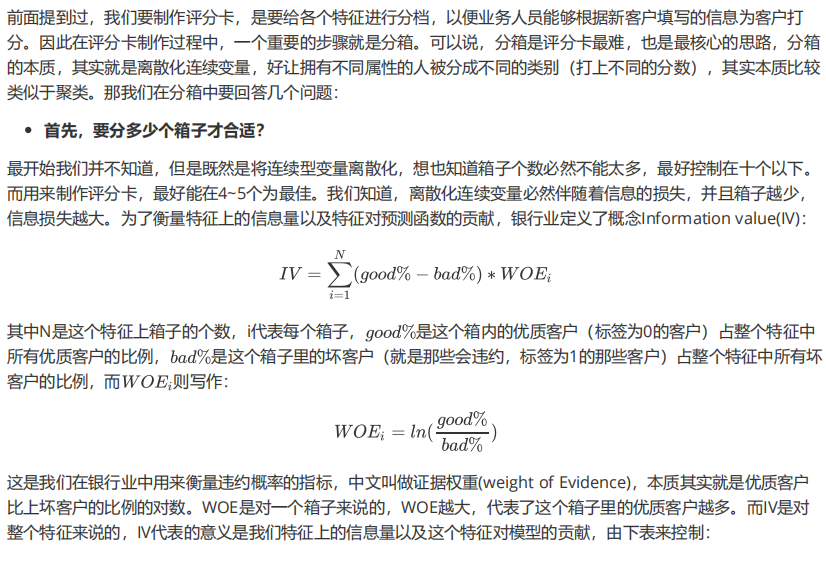


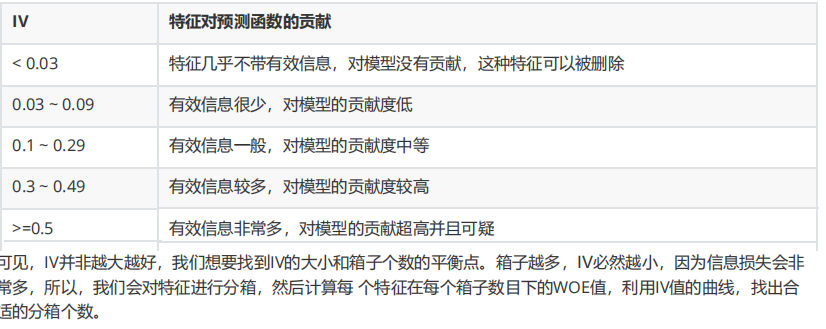

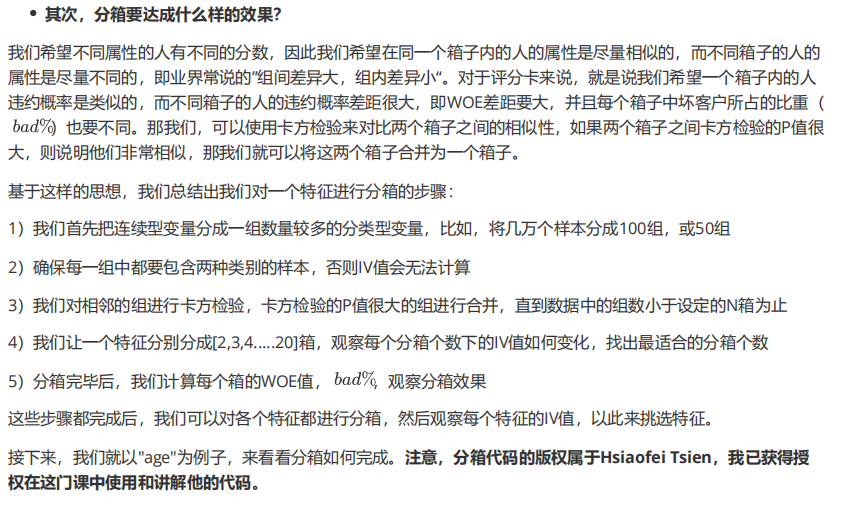

In [57]:
pd.qcut(model_data.age,retbins=True,q=20)

(0           (48.0, 50.0]
 1           (34.0, 36.0]
 2           (36.0, 39.0]
 3           (52.0, 54.0]
 4           (52.0, 54.0]
 5           (54.0, 56.0]
 6           (64.0, 68.0]
 7           (50.0, 52.0]
 8           (41.0, 43.0]
 9           (61.0, 64.0]
 10          (31.0, 34.0]
 11          (31.0, 34.0]
 12          (31.0, 34.0]
 13        (20.999, 28.0]
 14          (50.0, 52.0]
 15          (43.0, 45.0]
 16          (39.0, 41.0]
 17          (56.0, 58.0]
 18          (41.0, 43.0]
 19          (61.0, 64.0]
 20          (50.0, 52.0]
 21          (52.0, 54.0]
 22          (50.0, 52.0]
 23          (28.0, 31.0]
 24          (28.0, 31.0]
 25          (64.0, 68.0]
 26          (36.0, 39.0]
 27          (45.0, 47.0]
 28          (64.0, 68.0]
 29          (68.0, 74.0]
                ...      
 194978      (52.0, 54.0]
 194979      (68.0, 74.0]
 194980      (52.0, 54.0]
 194981      (58.0, 61.0]
 194982      (47.0, 48.0]
 194983      (39.0, 41.0]
 194984     (74.0, 109.0]
 194985     

In [58]:
model_data['qcut'],updown=pd.qcut(model_data.age,retbins=True,q=20)#q表示分箱的个数

In [59]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,1,0.312310,50,0,0.222211,9708.763251,11,0,1,0,1.618374,"(48.0, 50.0]"
1,0,0.511886,36,0,0.507284,3500.000000,9,0,0,0,0.000000,"(34.0, 36.0]"
2,1,0.319424,39,0,0.217706,6831.402877,8,0,1,0,1.319425,"(36.0, 39.0]"
3,0,0.001289,53,0,3734.000000,0.140000,15,0,1,0,0.759863,"(52.0, 54.0]"
4,1,0.944488,53,2,0.499579,8450.603198,10,0,1,1,0.000000,"(52.0, 54.0]"


In [60]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [61]:
#统计每个分箱的0，1的个数
count_y0=model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1=model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']
#num_bins统计上下界，0出现的个数和1出现的个数
num_bins = [*zip(updown,updown[1:,],count_y0,count_y1)]

In [62]:
num_bins

[(21.0, 28.0, 4215, 7398),
 (28.0, 31.0, 3471, 5889),
 (31.0, 34.0, 4021, 6850),
 (34.0, 36.0, 2913, 4728),
 (36.0, 39.0, 5179, 7554),
 (39.0, 41.0, 3940, 5847),
 (41.0, 43.0, 4004, 5711),
 (43.0, 45.0, 4404, 5925),
 (45.0, 47.0, 4702, 6293),
 (47.0, 48.0, 2462, 3151),
 (48.0, 50.0, 4899, 6146),
 (50.0, 52.0, 4721, 5843),
 (52.0, 54.0, 4665, 4886),
 (54.0, 56.0, 4655, 4187),
 (56.0, 58.0, 4459, 3494),
 (58.0, 61.0, 6727, 4778),
 (61.0, 64.0, 6905, 3245),
 (64.0, 68.0, 6647, 2349),
 (68.0, 74.0, 6793, 1829),
 (74.0, 109.0, 7733, 1390)]

In [63]:
 num_bins[0][2:]

(4215, 7398)

In [11]:
def get_woe(num_bins):
    columns=['min','max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns = columns)
    df['total']=df.count_0+df.count_1
    df['percentage']=df.total/df.total.sum()
    df['bad_rate']=df.count_1/df.total
    df['good%']=df.count_0/df.count_0.sum()
    df['bad%']=df.count_1/df.count_1.sum()
    df['woe']=np.log(df['good%']/df['bad%'])
    return df
def get_iv(df):
    rate = df['good%'] - df['bad%']
    iv=np.sum(rate*df.woe)
    return iv

In [64]:
#卡方检验，合并箱体，画出iv值曲线
#卡方检验检验每一组年龄和是否信誉之间的关系,如果相似
import scipy
import matplotlib.pyplot as plt
num_bins_ = num_bins.copy()

In [28]:
def get_bins(num_bins_,n):
    IV=[]
    axisx=[]
    while len(num_bins_)>n:
        psv=[]
        for i in range(len(num_bins_)-1):
            x1=num_bins_[i][2:]
            x2=num_bins_[i+1][2:]
            pv=scipy.stats.chi2_contingency([x1,x2])[1]
            psv.append(pv)
        i=psv.index(max(psv))
        num_bins_[i:i+2]=[( num_bins_[i][0]
                           ,num_bins_[i+1][1]
                           ,num_bins_[i][2]+num_bins_[i+1][2]
                           ,num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [29]:
after_bins=get_bins(num_bins,6)

In [30]:
after_bins

[(21.0, 36.0, 14620, 24865),
 (36.0, 52.0, 34311, 46470),
 (52.0, 61.0, 20506, 17345),
 (61.0, 64.0, 6905, 3245),
 (64.0, 74.0, 13440, 4178),
 (74.0, 109.0, 7733, 1390)]

In [31]:
get_woe(after_bins)#woe一般是单调或者只有一个转折点

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14620,24865,39485,0.202479,0.629733,0.149926,0.255044,-0.531296
1,36.0,52.0,34311,46470,80781,0.414245,0.575259,0.351854,0.476650,-0.303567
2,52.0,61.0,20506,17345,37851,0.194100,0.458244,0.210286,0.177910,0.167188
3,61.0,64.0,6905,3245,10150,0.052049,0.319704,0.070810,0.033284,0.754905
4,64.0,74.0,13440,4178,17618,0.090345,0.237144,0.137825,0.042854,1.168177
5,74.0,109.0,7733,1390,9123,0.046783,0.152362,0.079301,0.014257,1.715968


In [65]:
#将最佳分箱过程包装为函数,即以上分箱子的综合
def graphforbest(DF,X,Y, n=5,q=20,graph=True):
    '''
    基于卡方分布的分箱
    DF：输入的数据矩阵
    X：需要分箱的列名
    Y：分箱的数据对应的标签的Y的列名
    n：保留分箱的个数
    q：初始分箱的个数
    graph：是否画出IV曲线
    '''
    DF = DF[[X,Y]].copy()
    DF['qcut'],bins=pd.qcut(DF[X],retbins=True,q=q,duplicates='drop')
    coount_y0=DF.loc[DF[Y]==0].groupby(by='qcut').count()[Y]
    coount_y1=DF.loc[DF[Y]==1].groupby(by='qcut').count()[Y]
    num_bins = [*zip(bins,bins[1:,],coount_y0,coount_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2]=[(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
            continue
    
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1]=[(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break        
    def get_woe(num_bins):
        columns=['min','max','count_0','count_1']
        df = pd.DataFrame(num_bins,columns = columns)
        df['total']=df.count_0+df.count_1
        df['percentage']=df.total/df.total.sum()
        df['bad_rate']=df.count_1/df.total
        df['good%']=df.count_0/df.count_0.sum()
        df['bad%']=df.count_1/df.count_1.sum()
        df['woe']=np.log(df['good%']/df['bad%'])
        return df
    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv=np.sum(rate*df.woe)
        return iv
    num_bins_=num_bins.copy()
    IV=[]
    axisx=[]
    while len(num_bins_)>n:
        psv=[]
        for i in range(len(num_bins_)-1):
            x1=num_bins_[i][2:]
            x2=num_bins_[i+1][2:]
            pv=scipy.stats.chi2_contingency([x1,x2])[1]
            psv.append(pv)
        i=psv.index(max(psv))
        num_bins_[i:i+2]=[( num_bins_[i][0]
                           ,num_bins_[i+1][1]
                           ,num_bins_[i][2]+num_bins_[i+1][2]
                           ,num_bins_[i][3]+num_bins_[i+1][3])]
        global bins_df
        bins_df=pd.DataFrame(get_woe(num_bins_))
        axisx.append(len(num_bins_))
        IV.append(get_iv(bins_df))
    if graph:
        plt.figure(figsize=(6,3))
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel('number of box')
        plt.ylabel('iv')
        plt.show()

    return bins_df
            

RevolvingUtilizationOfUnsecuredLines


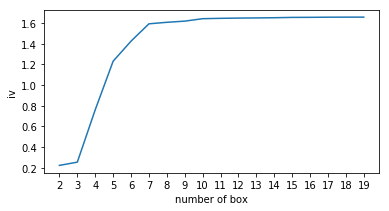

age


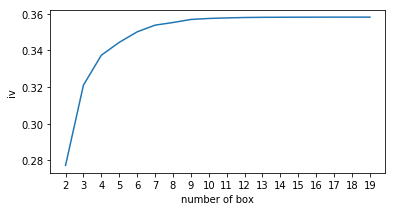

NumberOfTime30-59DaysPastDueNotWorse


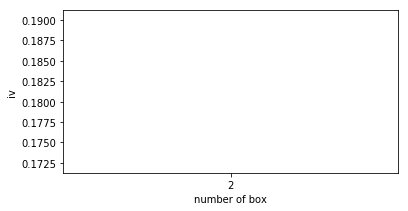

DebtRatio


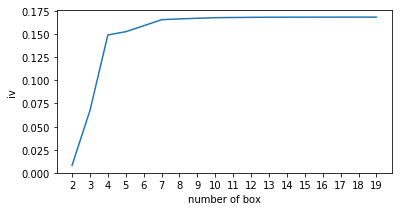

MonthlyIncome


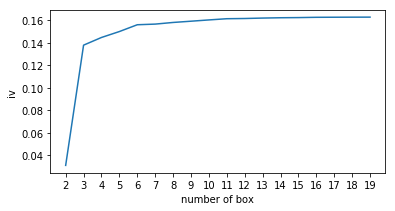

NumberOfOpenCreditLinesAndLoans


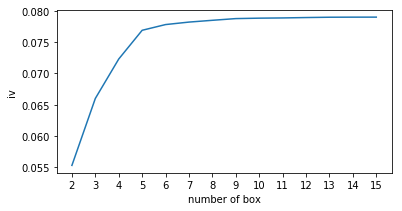

NumberOfTimes90DaysLate


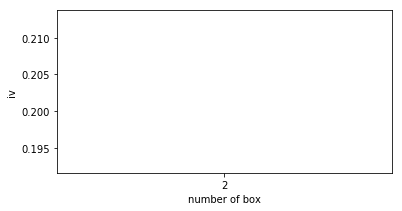

NumberRealEstateLoansOrLines


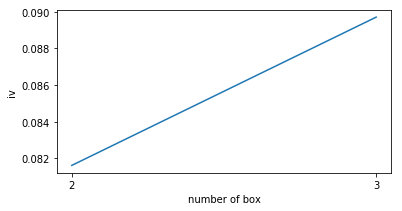

NumberOfTime60-89DaysPastDueNotWorse


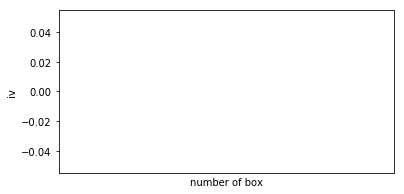

NumberOfDependents


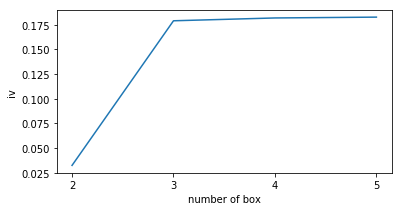

In [66]:
for i in model_data.columns[1:-1]:
    print(i)
    h=graphforbest(model_data,i,'SeriousDlqin2yrs',2,20,True)

In [67]:
#手动分箱
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6
                 ,"age":5
                 ,"DebtRatio":4
                 ,"MonthlyIncome":3
                 ,"NumberOfOpenCreditLinesAndLoans":6} #不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [68]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [69]:
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbest(model_data,col
                              ,"SeriousDlqin2yrs"
                              ,n=auto_col_bins[col]#使用字典的性质来取出每个特征所对应的箱的数量
                              ,q=20
                              ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [70]:
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.22168988800671863,
  0.38013250369999996,
  0.7236272152915242,
  0.9834691993609528,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01813381150513145,
  0.3602622319779912,
  1.4808576050527484,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 2.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

### 计算每一个分箱的woe，根据woe大小进行打分评估

In [71]:
#根据以上用pd.cut直接得到分箱最后的结果
data_2 =data[['age','SeriousDlqin2yrs']].copy()
data_2['cut']=pd.cut(data_2.age,[-np.inf, 36.0, 52.0, 61.0, 74.0, np.inf])
data_2.groupby('cut')['SeriousDlqin2yrs'].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  0                   20951
              1                    2541
(36.0, 52.0]  0                   48956
              1                    4414
(52.0, 61.0]  0                   29245
              1                    1751
(61.0, 74.0]  0                   29112
              1                     939
(74.0, inf]   0                   11028
              1                     228
Name: SeriousDlqin2yrs, dtype: int64

In [72]:
#使用unstack()来将树状结构变成表状结构
data_2.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",20951,2541
"(36.0, 52.0]",48956,4414
"(52.0, 61.0]",29245,1751
"(61.0, 74.0]",29112,939
"(74.0, inf]",11028,228


In [73]:
bins_df=data_2.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()

In [74]:
bins_df['woe']=np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [75]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",20951,2541,-0.537140
"(36.0, 52.0]",48956,4414,-0.240628
"(52.0, 61.0]",29245,1751,0.168753
"(61.0, 74.0]",29112,939,0.787322
"(74.0, inf]",11028,228,1.232078


In [76]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [77]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.22168988800671863,
  0.38013250369999996,
  0.7236272152915242,
  0.9834691993609528,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01813381150513145,
  0.3602622319779912,
  1.4808576050527484,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 2.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [78]:
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.222]     1.681683
 (0.222, 0.38]     0.160006
 (0.38, 0.724]    -0.627203
 (0.724, 0.983]   -1.327813
 (0.983, 1.0]     -0.480366
 (1.0, inf]       -2.056189
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.531296
 (36.0, 52.0]   -0.303567
 (52.0, 61.0]    0.167188
 (61.0, 74.0]    1.008026
 (74.0, inf]     1.715968
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0181]    1.521119
 (0.0181, 0.36]    0.058738
 (0.36, 1.481]    -0.355858
 (1.481, inf]      0.178599
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]      1.372637
 (0.1, 5600.0]   -0.240634
 (5600.0, inf]    0.240540
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.874431
 (1.0, 2.0]    -0.443693
 (2.0, 3.0]    -0.270891
 (3.0, 5.0]    -0.056347
 (5.0, 17.0]    0.129650
 (17.0, inf]    0.471400
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351971
 (0.0, 1.0]    -0.885552
 (1.0, 2.0]    -1.352407
 (2.0, inf]    -1.5189

In [79]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index) #将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"] #这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.303567,0.160006,0.058738,0.240540,0.12965,0.351971,0.239597,0.196741,0.127559,-0.529511,1
1,-0.531296,-0.627203,-0.355858,-0.240634,0.12965,0.351971,0.239597,-0.404157,0.127559,0.669004,0
2,-0.303567,0.160006,0.058738,0.240540,0.12965,0.351971,0.239597,0.196741,0.127559,-0.529511,1
3,0.167188,1.681683,0.178599,-0.240634,0.12965,0.351971,0.239597,0.196741,0.127559,-0.518026,0
4,0.167188,-1.327813,-0.355858,0.240540,0.12965,-1.352407,0.239597,0.196741,-1.398128,0.669004,1


### 建模

In [80]:
#测试集用woe表示
vali_woe = pd.DataFrame(index=test_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(test_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = test_data["SeriousDlqin2yrs"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]
X = model_woe.iloc[:,:-1] 
Y = model_woe.iloc[:,-1]

In [81]:
vali_X.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-1.327813,-0.531296,0.178599,-0.240634,-0.056347,0.351971,-1.768208,-0.404157,0.127559,0.669004
1,-0.627203,-0.303567,0.058738,0.240540,0.129650,-0.885552,0.239597,0.644887,0.127559,-0.529511
2,-1.327813,-0.531296,0.058738,-0.240634,-0.270891,0.351971,0.239597,-0.404157,0.127559,-0.529511
3,-2.056189,-0.531296,0.178599,-0.240634,-0.056347,0.351971,0.239597,-0.404157,0.127559,0.669004
4,0.160006,-0.531296,0.058738,-0.240634,0.129650,0.351971,0.239597,-0.404157,0.127559,0.669004


In [82]:
from sklearn.linear_model import LogisticRegression as LR

In [83]:
lr = LR(C=0.01).fit(X,Y)
lr.score(vali_X,vali_y) #这个分数不重要，主要是要识别出违约顾客
#评分低的原因是分类时测试集和训练集误差太大了，交叉验证法可以达到八十多的准确率

0.7760122523212405

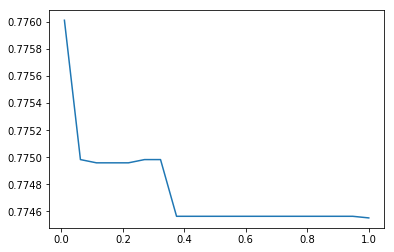

In [84]:
#调学习曲线
c_1 = np.linspace(0.01,1,20)
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,Y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()

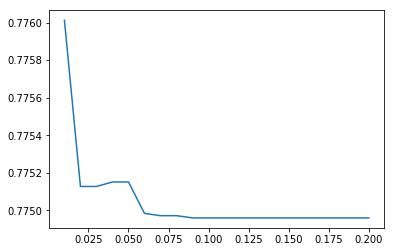

In [85]:
c_2 = np.linspace(0.01,0.2,20)
score = []
for i in c_2: 
    lr = LR(solver='liblinear',C=i).fit(X,Y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

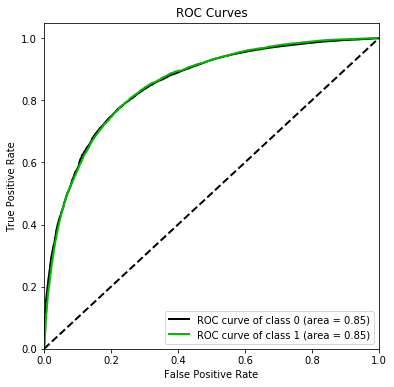

In [86]:
#ROC曲线
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)
#非常有效的

评分卡打分机制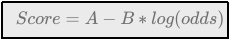，此处设600分时对数几率为1/60,620分时对书几率为1/30

In [87]:
B = 20/np.log(2) 
A = 600 + B*np.log(1/60)

In [88]:
B,A

(28.85390081777927, 481.8621880878296)

In [89]:
lr.intercept_ #截距

array([0.00259109])

In [90]:
lr.coef_ #每个特征对应的系数

array([[-0.29987382, -0.73131541, -0.88918443, -0.50387664, -0.25679835,
        -0.54434546, -0.56178122, -0.94107756, -0.28270201, -0.8289316 ]])

In [91]:
lr.coef_[0][1] #age特征对应的系数

-0.7313154091981979

In [92]:
woeall['age']*lr.coef_[0][1]*B

cut
(-inf, 36.0]    11.211045
(36.0, 52.0]     6.405650
(52.0, 61.0]    -3.527876
(61.0, 74.0]   -21.270667
(74.0, inf]    -36.209149
dtype: float64

In [93]:
base_score = A - B*lr.intercept_
base_score
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

cut
(-inf, 36.0]    -4.597058
(36.0, 52.0]    -2.626619
(52.0, 61.0]     1.446596
(61.0, 74.0]     8.721977
(74.0, inf]     14.847460
dtype: float64

In [98]:
file = r"D:\数据分析题目\数据集\05逻辑回归与评分卡\评分卡.csv"
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

In [99]:
data_=open(r"D:\数据分析题目\数据集\05逻辑回归与评分卡\评分卡.csv")
pd.read_csv(data_)

,base_score,[481.78742512]
0,age,Score
1,"(-inf, 36.0]",-4.597057559536514
2,"(36.0, 52.0]",-2.626618750441505
3,"(52.0, 61.0]",1.4465957778240532
4,"(61.0, 74.0]",8.72197705627131
5,"(74.0, inf]",14.847459628562813
6,RevolvingUtilizationOfUnsecuredLines,Score
7,"(-inf, 0.222]",35.485697706294815
8,"(0.222, 0.38]",3.3763253045352015
9,"(0.38, 0.724]",-13.234802495980203
